# Unit 5 - Financial Planning

In [136]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [137]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [138]:
# Set current amount of crypto assets

crypto_data={
    "crypto assets": [1.2, 5.3]
}
tickers= ['BTC','ETH']
df_crypto_assets = pd.DataFrame(crypto_data, index=tickers)
df_crypto_assets

,crypto assets
BTC,1.2
ETH,5.3


In [139]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [140]:
# Fetch current BTC price
data_btc= requests.get(btc_url).json()
print(data_btc)
print(json.dumps(data_btc, indent= 4))

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19160693, 'total_supply': 19160693, 'max_supply': 21000000, 'quotes': {'USD': {'price': 18876.79, 'volume_24h': 22289177047, 'market_cap': 361636362839, 'percentage_change_1h': 0.426393001171249, 'percentage_change_24h': -0.371915700874156, 'percentage_change_7d': -2.88294937650731, 'percent_change_1h': 0.426393001171249, 'percent_change_24h': -0.371915700874156, 'percent_change_7d': -2.88294937650731}, 'CAD': {'price': 25651.669931, 'volume_24h': 30288762689.1683, 'market_cap': 491427653461.917, 'percent_change_1h': 0.426393001171249, 'percent_change_24h': -0.371915700874156, 'percent_change_7d': -2.88294937650731}}, 'last_updated': 1664152475}}, 'metadata': {'timestamp': 1664152475, 'num_cryptocurrencies': 3116, 'error': None}}
{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug":

In [141]:
price_btc= data_btc['data']['1']["quotes"]['CAD']['price']
price_btc

25651.669931

In [142]:
# Fetch current ETH price
data_eth= requests.get(eth_url).json()
print(data_eth)
print(json.dumps(data_eth, indent= 4))

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 120680235, 'total_supply': 120680235, 'max_supply': 120679977, 'quotes': {'USD': {'price': 1304.89, 'volume_24h': 10680997708, 'market_cap': 157576785453, 'percentage_change_1h': 0.639250844267806, 'percentage_change_24h': -1.02850834918879, 'percentage_change_7d': -2.31811790606676, 'percent_change_1h': 0.639250844267806, 'percent_change_24h': -1.02850834918879, 'percent_change_7d': -2.31811790606676}, 'CAD': {'price': 1773.215021, 'volume_24h': 14514407785.4012, 'market_cap': 214131093752.082, 'percent_change_1h': 0.639250844267806, 'percent_change_24h': -1.02850834918879, 'percent_change_7d': -2.31811790606676}}, 'last_updated': 1664152486}}, 'metadata': {'timestamp': 1664152486, 'num_cryptocurrencies': 3116, 'error': None}}
{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "w

In [143]:
price_eth= data_eth['data']['1027']["quotes"]['CAD']['price']
price_eth

1773.215021

In [144]:
# Compute current value of my crpto
btc_value = price_btc * df_crypto_assets.loc["BTC"]["crypto assets"]
eth_value = price_eth * df_crypto_assets.loc["ETH"]["crypto assets"]

In [145]:
# Print current crypto wallet balance
print(f"The current value of my BTC is ${btc_value:0.2f}")
print(f"The current value of my ETH is ${eth_value:0.2f}")

The current value of my BTC is $30782.00
The current value of my ETH is $9398.04


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [146]:
# Set current amount of shares
my_agg = 200
my_spy = 50
shares_data={
    "shares":[my_agg, my_spy]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [147]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [148]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [149]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [150]:
# Format current date as ISO format
today = pd.Timestamp("2022-09-22", tz="America/New_York").isoformat()

In [151]:
# Reorganize the DataFrame
# Set the tickers
tickers = ["AGG", "SPY"]

In [152]:
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [153]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio

AGG                                             \
                           open   high      low close   volume trade_count   
timestamp                                                                    
2022-09-22 04:00:00+00:00  97.9  97.92  97.4039  97.5  7092118       25072   

                                        SPY                                   \
                                vwap   open   high     low   close    volume   
timestamp                                                                      
2022-09-22 04:00:00+00:00  97.595666  376.5  378.3  373.44  374.22  88922900   

                                                   
                          trade_count        vwap  
timestamp                                          
2022-09-22 04:00:00+00:00      630401  375.330794

In [154]:
# Fetch the current closing prices from the DataFrame
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])

In [155]:

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $97.5
Current SPY closing price: $374.22


In [156]:
# Compute the current value of shares
agg_value = agg_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_price * df_shares.loc["SPY"]["shares"]

# Print current value of shares
print(f"The current value of my AGG shares is ${agg_value:0.2f}")
print(f"The current value of my SPY shares is ${spy_value:0.2f}")

The current value of my AGG shares is $19500.00
The current value of my SPY shares is $18711.00


### Savings Health Analysis

In [157]:
# Set monthly household income
monthly_income= 10000

# Consolidate financial ssets data
# BTC/ETH
crypto_value= {'crypto assets':[btc_value, eth_value]}
df_crypto_shares = pd.DataFrame(crypto_value)    
total_btc_eth= df_crypto_shares.sum()
total_btc_eth[0]

40180.0435285

In [158]:
#SHARES
shares_value={
"shares assets": [agg_value, spy_value]
}

df_shares_assets = pd.DataFrame(shares_value, index=tickers)
total_shares= df_shares_assets.sum()
total_shares[0]

38211.0

In [159]:
# Create savings DataFrame
savings_data={'savings': [total_btc_eth[0], total_shares[0]]}
tickers= ["crypto", "shares"]
savings_df= pd.DataFrame(savings_data, index=tickers)
savings_df

,savings
crypto,40180.043528
shares,38211.000000


<AxesSubplot:title={'center':'composition of personal savings'}, ylabel='savings'>

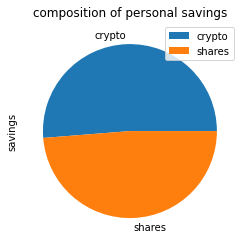

In [160]:
# Plot savings pie chart
savings_df.plot.pie(y= 'savings', title= 'composition of personal savings')

In [161]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

30000

In [162]:
# Calculate total amount of savings
total_savings=savings_df.sum()
total_savings[0]

78391.0435285

In [163]:
# Validate saving health
saving_difference=[]
saving_difference= total_savings[0]-[emergency_fund]
saving_difference[0]
print(f"Net saving is ${saving_difference[0]:0.2f}")
print("Congratulations! You have enough money in your emergency fund.")

Net saving is $48391.04
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [164]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [167]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [168]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [172]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [173]:
# Get 5 years' worth of historical data for SPY and AGG
df_portfolio_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
#timeframe = "1Day"

# Display sample data
df_portfolio_year

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.42,418.2200,416.8111,417.61,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.97,418.1400,416.3000,417.52,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.84,419.0100,416.9000,417.40,50692781,330049,417.742098,SPY


In [174]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE H
# Separate ticker data
AGG = df_portfolio_year[df_portfolio_year['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio_year[df_portfolio_year['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_year = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_portfolio_year

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.65  3480303   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.3700  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.49  6469432   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.4100   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.2800   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.4200   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.4700   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.8800   
...                               ...         ...     ...     ...       ...   
2021-04-26 04:00:00+00:00       13520  114.706244  417.42  418.22  416.8111   
2021-04-27 04:00:00+00:00       12720  114.498315  417.97  418.14  416.3000   
2021-04-28 04:00:00+00:00       24303  114.379810  417.84  419.01  416.9000   
2021-04-29 04:00:00+00:00       21096  114.250702  420.38  420.72  416.4400   
2021-04-30 04:00:00+00:00       19582  114.456246  417.67  418.54  416.3400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074  
...                           ...        ...         ...         ...  
2021-04-26 04:00:00+00:00  417.61   51824860      295870  417.508245  
2021-04-27 04:00:00+00:00  417.52   50297139      296300  417.481360  
2021-04-28 04:00:00+00:00  417.40   50692781      330049  417.742098  
2021-04-29 04:00:00+00:00  420.06   76965583      443396  418.824046  
2021-04-30 04:00:00+00:00  417.30   84731942      478844  417.651995  

[1259 rows x 14 columns]

In [188]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [189]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [190]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ABUZAR\FINTECHMAIN\Python7\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999999,1.010646,0.998951,1.000277,1.010540,1.025344,1.000777,1.008414,0.994438,1.005759,...,1.001918,0.995996,1.020288,0.995763,1.006942,1.009443,1.005343,0.997308,1.001169,1.008525
2,1.019279,1.008110,0.998625,1.000923,1.006675,1.024696,0.981499,1.013026,1.002047,1.010837,...,1.011269,1.007762,1.032439,0.987371,1.002427,1.008206,0.981738,1.005320,1.002645,1.012000
3,1.001419,1.000458,1.005442,0.997572,1.021501,1.016514,0.980776,1.030406,0.992047,1.015925,...,1.000629,1.004972,1.034766,0.988496,0.998702,1.022458,0.981149,1.016359,1.014319,1.016969
4,1.004069,0.998916,1.004804,0.994740,1.027855,1.009715,0.974953,1.043152,0.983663,1.007356,...,1.002983,0.989263,1.026124,0.980531,1.010751,1.013617,0.974373,1.022362,1.029828,1.007914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.468856,26.086969,14.283859,5.601660,27.339127,23.567285,49.540771,9.470389,103.381928,10.998520,...,54.785318,11.294179,21.311741,25.699987,46.574240,69.460740,39.879739,67.154658,108.498337,49.046608
7557,12.389466,26.013524,14.263544,5.594844,27.106694,23.497639,48.810899,9.548052,103.794641,10.951887,...,55.130050,11.300132,21.221258,25.832959,46.408260,69.514189,39.921001,67.809596,107.785996,49.025044
7558,12.312296,25.930505,14.222290,5.598781,27.276888,23.487053,48.826510,9.472648,104.718360,11.059753,...,54.983281,11.315490,20.978653,25.724503,46.454940,69.636708,39.794610,67.623534,106.226492,49.210748
7559,12.272728,26.150625,14.314503,5.535598,27.060147,23.344108,48.989907,9.622651,105.795520,11.152364,...,55.144071,11.409277,20.916442,25.624791,46.637132,69.134672,39.948996,68.547950,106.977854,49.070204


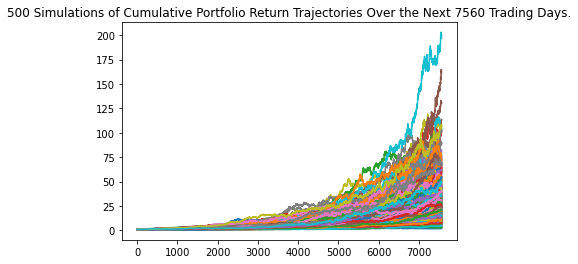

In [191]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

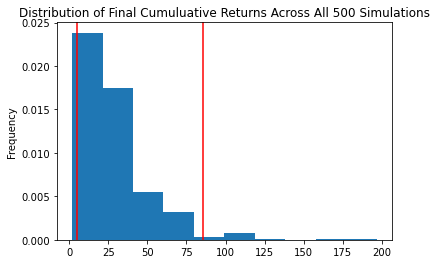

In [192]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [193]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             28.109415
std              22.683760
min               1.909543
25%              12.302564
50%              22.542718
75%              35.791905
max             196.615966
95% CI Lower      5.119416
95% CI Upper     85.858705
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [194]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $102388.32 and $1717174.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [197]:
# Set initial investment
initial_investment = 20000 * 1.5
initial_investment= 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $153582.48 and $2575761.15


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [222]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyyear = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [224]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ABUZAR\FINTECHMAIN\Python7\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009435,0.997387,0.995905,1.018939,0.999409,1.003042,1.000442,1.005716,1.011032,1.003509,...,0.997621,0.997761,0.986849,1.015225,1.003519,1.011454,1.014774,0.998287,0.999898,0.997579
2,1.021363,1.004626,0.985873,0.999421,0.982790,1.005743,0.988120,1.013423,0.994190,0.996381,...,1.009940,0.996324,0.979285,1.001426,1.028804,1.005279,1.012439,0.981824,0.994339,1.000826
3,1.026984,1.012320,0.988511,1.005733,0.979997,1.008269,0.992728,1.019350,0.983815,0.987359,...,1.023953,1.004532,0.976808,1.016614,1.024405,0.997798,1.017690,0.990992,1.000406,1.016819
4,1.025438,1.010245,0.994557,1.023600,1.006470,1.013069,0.989012,1.012579,0.978971,0.987578,...,1.022301,1.004191,0.971946,1.035184,1.049506,1.005912,1.021725,1.006200,1.010356,1.015619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.508370,1.669560,1.657868,3.895657,1.531834,2.329848,3.542926,1.783190,1.963797,1.893714,...,5.770513,1.216157,1.230733,1.427163,1.353639,2.223719,1.422171,1.255532,3.449751,2.431865
1257,1.540291,1.692041,1.655800,3.976039,1.532477,2.262668,3.596226,1.786025,1.959307,1.909631,...,5.776984,1.210866,1.248550,1.431665,1.329635,2.224697,1.416430,1.256728,3.427223,2.414912
1258,1.522613,1.701164,1.673988,3.981338,1.538400,2.258461,3.656030,1.777724,1.936218,1.936223,...,5.675955,1.223409,1.234112,1.429975,1.333237,2.237220,1.427888,1.249998,3.425615,2.399375
1259,1.507210,1.685971,1.668716,4.032845,1.536792,2.255070,3.672044,1.787592,1.930391,1.943457,...,5.661637,1.225176,1.226140,1.415314,1.329882,2.211502,1.421556,1.243216,3.412275,2.419630


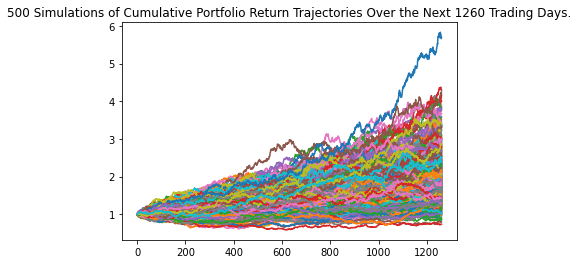

In [225]:
# Plot simulation outcomes
line_plot = MC_fiveyyear.plot_simulation()

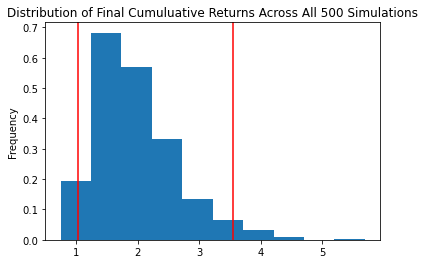

In [226]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyyear.plot_distribution()

In [227]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.952661
std               0.662378
min               0.741165
25%               1.468376
50%               1.832837
75%               2.288916
max               5.693471
95% CI Lower      1.021890
95% CI Upper      3.553420
Name: 1260, dtype: float64


In [228]:
# Set initial investment
initial_investment= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $61313.43 and $213205.19


### Ten Years Retirement Option

In [204]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [205]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ABUZAR\FINTECHMAIN\Python7\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006238,1.002126,1.007379,0.997338,0.980602,1.012083,0.997153,1.010753,1.007033,0.987864,...,0.990626,0.986741,0.997978,1.004788,1.007726,0.997062,0.999490,1.018764,0.997387,1.006033
2,1.011710,1.010768,1.012334,0.996290,0.983306,1.009396,0.995649,1.010222,0.991622,0.992691,...,0.992889,0.983141,0.987884,1.011160,1.019727,1.002543,0.974429,1.014598,0.990542,1.012971
3,1.021293,1.004648,1.028098,0.984432,0.977967,0.978078,0.993631,1.012151,0.995440,1.019412,...,0.999624,0.984489,0.980840,1.019886,1.024193,0.999863,0.973344,1.023706,0.982507,1.006099
4,1.010419,1.000212,1.035140,0.974687,0.974291,0.962465,0.992336,1.031789,1.015246,1.020608,...,1.007876,0.981881,0.994140,1.021197,1.015879,1.005774,0.960671,1.032728,0.972262,1.001697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.438576,1.674648,4.811714,3.462321,5.153481,2.192533,4.745394,2.571384,2.871628,4.731613,...,9.193364,4.514701,1.261492,2.345124,3.139134,3.978701,2.403875,2.011288,2.770897,2.705659
2517,7.528251,1.673974,4.825502,3.471922,5.065410,2.196796,4.734025,2.538174,2.881523,4.784630,...,9.154215,4.516275,1.250800,2.352339,3.147319,3.953419,2.402337,2.022933,2.771252,2.656581
2518,7.568136,1.692842,4.773160,3.474497,5.044261,2.201689,4.710645,2.561588,2.836752,4.811763,...,9.215884,4.512352,1.254418,2.406375,3.144153,3.969752,2.411117,2.038671,2.795643,2.641469
2519,7.532401,1.690807,4.732545,3.455766,5.107113,2.236502,4.671231,2.555351,2.859293,4.855777,...,9.110974,4.481903,1.240233,2.386587,3.108081,4.011481,2.431283,2.042756,2.803932,2.661749


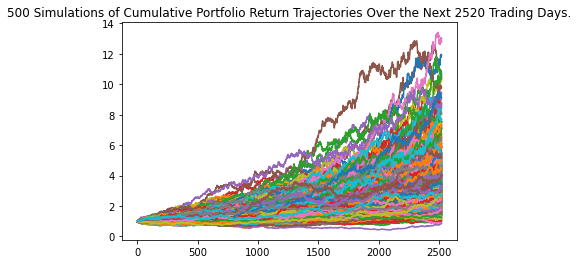

In [206]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

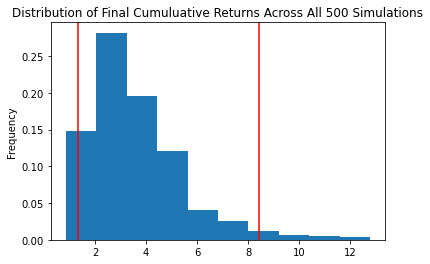

In [207]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [208]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.601197
std               1.829878
min               0.853337
25%               2.323062
50%               3.173019
75%               4.456507
max              12.770780
95% CI Lower      1.322084
95% CI Upper      8.424358
Name: 2520, dtype: float64


In [209]:
# Set initial investment
inital_investment= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $79325.03 and $505461.49
